In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import adjusted_rand_score

def plot_images(data, n_img_per_row=10, cmap='gray'):
    shape = int(np.sqrt(len(data[0])))
    full_img = np.zeros((shape * n_img_per_row, shape * n_img_per_row))
    for i in range(n_img_per_row):
        ix = shape * i
        for j in range(n_img_per_row):
            iy = shape * j
            img = data[i * n_img_per_row + j].reshape((shape, shape))
            full_img[ix:ix + shape, iy:iy + shape] = img

    plt.figure(figsize=(8, 8))
    plt.imshow(full_img, cmap=cmap)
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [2]:
original_df = pd.read_csv('data/mnist_train.csv')

In [3]:
df = original_df.copy()
df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [5]:
X, Y = df.iloc[:, 1:], df.iloc[:, :1]
X, Y = X.to_numpy(), Y.to_numpy().transpose()[0]
X_train, X_test = X[:20000, :], X[20000:24000, :]
Y_train, Y_test = Y[:20000], Y[20000:24000]
X_test, Y_test

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
 array([5, 9, 7, ..., 3, 9, 4], dtype=int64))

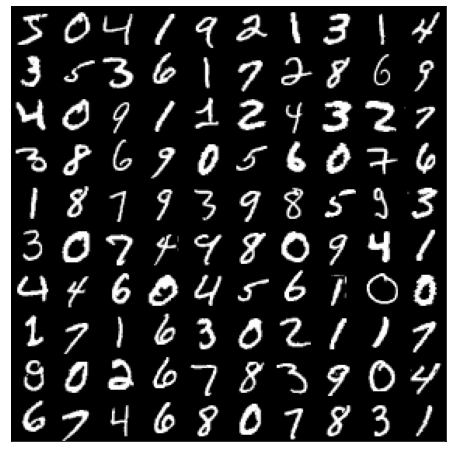

In [6]:
plot_images(X_train)

In [7]:
clf = SVC(kernel='linear')
clf.fit(X_train, Y_train)

SVC(kernel='linear')

In [8]:
predictions = clf.predict(X_test)

In [9]:
adjusted_rand_score(predictions, Y_test)

0.8219130891130788